In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl
from math import *
from functions.plot_gradient import *
from functions_old.multi_gradient_descent import feature_scaling
from functions.logistic_regression import * 

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    m = x.shape[0]
    for i in range(x.shape[0]):
        if y[i] ==1:
            k -= (1/m)*np.log(fun(x[i],w,b))
        if y[i] ==0:
            k -= (1/m)*(np.log(1-fun(x[i],w,b)))
    return k
def compute_gradient(x,y,w,b):
    lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for refualrization
    for j in range(x.shape[1]):
        dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    hist = []
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        k  =cost(x,y,w,b)
        hist.append([i,k])
        if i%100 ==0:
            # print(w,b,"-------------------------------- cost: ",cost(x,y,w,b))
            print("itreation: ",i,"-------------------------------- cost: ",k)
            pass
    return w,b,hist
def predict(X, w, b): 
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        for j in range(n): 
            z_wb += 0
        z_wb += b
        
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb>0.5 else 0
        
    return p




In [25]:
file = "../data from book/BrainCancer.csv"
data = pd.read_csv(file)
data.head()


,Unnamed: 0,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,1,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,2,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,3,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,4,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,5,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [26]:
ls = []
leadger = []
def categorical_data(x):
    if x not in ls:
        ls.append(x)
    return ls.index(x)

data['diagnosis'] = data['diagnosis'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['loc'] = data['loc'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['stereo'] = data['stereo'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['sex'] = data['sex'].apply(categorical_data)
leadger.append(ls)
ls =[]
print(leadger)
# data
x_data = (np.array(data[['diagnosis','loc','stereo','sex','ki','gtv']]))
y_data = (np.array(data['status']))
X = feature_scaling(x_data)

[['Meningioma', 'HG glioma', 'LG glioma', nan, 'Other'], ['Infratentorial', 'Supratentorial'], ['SRS', 'SRT'], ['Female', 'Male']]


C:\Users\DINO\AppData\Local\Temp\ipykernel_23288\58001190.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


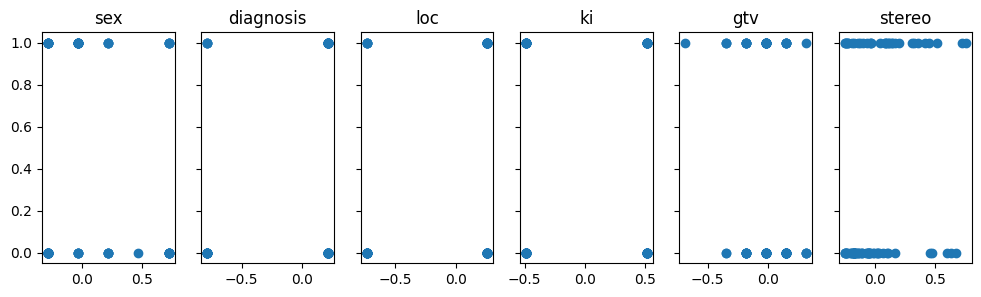

In [27]:
x_features = ['diagnosis','loc','stereo','sex','ki',"gtv"]
fig,ax=pl.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(x_data.shape[1]):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].set_title(x_features[i])
fig.show()
    

In [28]:
# per_w ,per_b,hist = gradient_descent(X,y_data,np.zeros([X.shape[1]]),0,0.01,10000,logistic=True,lambda_ =0)
per_w ,per_b,hist = logistic_descent(X,y_data,0.01,10000)
hist = np.array(hist)

itreation:  0 -------------------------------- cost:  0.6930419769202826
itreation:  100 -------------------------------- cost:  0.6847696742086515
itreation:  200 -------------------------------- cost:  0.6797212136841696
itreation:  300 -------------------------------- cost:  0.6766225991131053
itreation:  400 -------------------------------- cost:  0.6747050324448937
itreation:  500 -------------------------------- cost:  0.6735046898381645
itreation:  600 -------------------------------- cost:  0.6727411585229796
itreation:  700 -------------------------------- cost:  0.6722444028966801
itreation:  800 -------------------------------- cost:  0.6719109913851764
itreation:  900 -------------------------------- cost:  0.6716778201338637
itreation:  1000 -------------------------------- cost:  0.6715062879703986
itreation:  1100 -------------------------------- cost:  0.671372729112969
itreation:  1200 -------------------------------- cost:  0.6712626071817551
itreation:  1300 --------

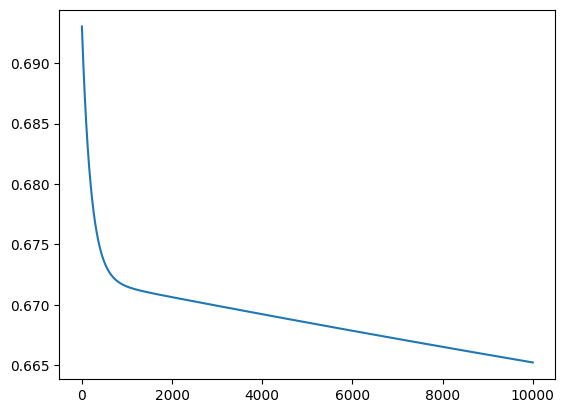

In [29]:
pl.plot(hist[:,0],hist[:,1])
pl.show()

In [30]:
pred = predict(X,per_w,per_b)
print('Train Accuracy: %f'%(np.mean(pred == y_data) * 100))

Train Accuracy: 60.227273


In [32]:
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        # x_features  = ['diagnosis'0-4 ,'loc'0-1,'stereo'0-1,'sex'0-1,'ki','gtv']
        ki = np.linspace(-1, 1.5, 50)
        gvt = np.linspace(-1, 1.5, 50)
        
        z = np.zeros()

        # Evaluate z = theta*x over the grid
        for k in range(len(ki)):
            for g in range(len(gvt)):
                for d in range(5):
                    for l in range(2):
                        for s in range(2):
                            for sex in range(2):
                                        z[k,g] = sig(np.dot( (d,l,s,sex, ki[k], gvt[g] ), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(ki,gvt,z, levels = [0.5], colors="g")

In [33]:

plot_decision_boundary(per_w,per_b,X,y_data)

TypeError: plot_data() missing 1 required positional argument: 'ax'